In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import os
from collections import Counter

## Read in Data

In [46]:
os.listdir('user_jsons')
# File Sec2Gr2_69117.json does not have corresponding CSV

['Sec1Gr3_11111.json',
 '.DS_Store',
 'Sec1Gr1_10824.json',
 'Sec2Gr2_69117.json',
 'Merging Datasets.ipynb',
 'Sec1Gr1_50405.json',
 'Sec2Gr2_33534.json',
 '.ipynb_checkpoints',
 'Sec1Gr1_12345.json',
 'Sec2Gr2_26301.json',
 'Sec2Gr2_38129.json']

In [47]:
os.listdir('pyktok_data')
# Files 'Sec2Gr3_77777.csv','Sec2Gr3_77217.csv', Sec2Gr3_74721.csv
# do not have a corresponding JSON

['.DS_Store',
 'Sec1Gr3_11111.csv',
 'Sec2Gr3_77777.csv',
 'Sec2Gr3_77217.csv',
 'Sec1Gr1_10824.csv',
 'Sec2Gr3_74721.csv',
 'Sec1Gr1_50405.csv',
 'Sec1Gr1_12345.csv',
 'results_26301_1.csv',
 'results_26301_2.csv',
 'Sec1Gr2_26301.csv',
 '.ipynb_checkpoints',
 'Sec1Gr2_38129.csv',
 'Sec1Gr2_33534.csv',
 'results_12345_2.csv']

In [45]:
codes = ['10824','11111','12345','26301','33534','38129','50405']

In [6]:
# filenames = """['Sec2Gr3_77777.csv',
#  'Sec2Gr3_77217.csv',
#  'Sec1Gr1_10824.csv',
#  'Sec2Gr3_74721.csv',
#  'Sec1Gr1_50405.csv',
#  'Sec1Gr1_12345.csv',
#  'Sec1Gr2_26301.csv',
#  'Sec1Gr2_38129.csv',
#  'Sec1Gr2_33534.csv']"""

# pattern = re.compile('\d\d\d\d\d')
# codes = pattern.findall(filenames)
# for code in codes: print(f"'{code}',")
# codes = ['77777','77217','10824','74721','50405','12345','26301','38129','33534']

In [31]:
keep_cols = ['video_id', 'video_timestamp', 'video_duration',
       'video_locationcreated', 'suggested_words', 'video_diggcount',
       'video_sharecount', 'video_commentcount', 'video_playcount',
       'video_description', 'video_is_ad', 'video_stickers', 'author_username',
       'author_name', 'author_followercount', 'author_followingcount',
       'author_heartcount', 'author_videocount', 'author_diggcount',
       'author_verified']

In [8]:
# df77777 = pd.read_csv('pyktok_data/Sec2Gr3_77777.csv')
# df77217 = pd.read_csv('pyktok_data/Sec2Gr3_77217.csv')
# df74721 = pd.read_csv('pyktok_data/Sec2Gr3_74721.csv')
df10824 = pd.read_csv('pyktok_data/Sec1Gr1_10824.csv')
df10824 = df10824.loc[:,keep_cols]

df11111_original = pd.read_csv('pyktok_data/Sec1Gr3_11111.csv')
df11111_original = df11111_original.loc[:,keep_cols]

df12345 = pd.read_csv('pyktok_data/Sec1Gr1_12345.csv')
df12345 = df12345.loc[:,keep_cols]

df26301 = pd.read_csv('pyktok_data/Sec1Gr2_26301.csv')
df26301 = df26301.loc[:,keep_cols]

df33534 = pd.read_csv('pyktok_data/Sec1Gr2_33534.csv')
df33534 = df33534.loc[:,keep_cols]

df38129 = pd.read_csv('pyktok_data/Sec1Gr2_38129.csv')
df38129 = df38129.loc[:,keep_cols]

df50405 = pd.read_csv('pyktok_data/Sec1Gr1_50405.csv')
df50405 = df50405.loc[:,keep_cols]

/var/folders/yl/zl57ck115t9_8v83kxw1gtc40000gn/T/ipykernel_18826/1229274257.py:7: DtypeWarning: Columns (8,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df11111_original = pd.read_csv('pyktok_data/Sec1Gr3_11111.csv')


In [9]:
print(type(df10824['video_is_ad'].iloc[0]))
print(type(df11111_original['video_is_ad'].iloc[0]))

<class 'numpy.bool_'>
<class 'str'>


In [10]:
# Need to clean df11111
print(df11111_original.shape)
print(df11111_original['video_is_ad'].value_counts())

(58836, 20)
video_is_ad
False          50491
True            6934
FALSE           1265
TRUE             143
568200             1
video_is_ad        1
Name: count, dtype: int64


In [11]:
# Only keep columns with True or False labeling
df11111_dropped = df11111_original[df11111_original['video_is_ad'].isin(['False','True','FALSE','TRUE'])]
df11111 = df11111_dropped.copy()

# change TRUE to True and FALSE to False
df11111['video_is_ad'] = df11111_dropped['video_is_ad'].str.lower().map({"true": True, "false": False})
print(df11111.shape)
print(df11111['video_is_ad'].value_counts())
print(df11111.dtypes)

(58833, 20)
video_is_ad
False    51756
True      7077
Name: count, dtype: int64
video_id                 object
video_timestamp          object
video_duration           object
video_locationcreated    object
suggested_words          object
video_diggcount          object
video_sharecount         object
video_commentcount       object
video_playcount          object
video_description        object
video_is_ad                bool
video_stickers           object
author_username          object
author_name              object
author_followercount     object
author_followingcount    object
author_heartcount        object
author_videocount        object
author_diggcount         object
author_verified          object
dtype: object


In [12]:
dfs = [df10824,df11111,df12345,df26301,df33534,df38129,df50405]

In [13]:
for code, df in zip(codes, dfs):
    print(f"User {code}, {len(df)}  videos")

User 10824, 10999  videos
User 11111, 58833  videos
User 12345, 19102  videos
User 26301, 8068  videos
User 33534, 7663  videos
User 38129, 31  videos
User 50405, 24288  videos


In [14]:
# add a 'user' column to each df
for code, df in zip(codes, dfs): 
    df['user'] = code

In [36]:
# create a df with all user data
all_dfs = pd.concat(dfs)
all_dfs['video_timestamp'] = pd.to_datetime(all_dfs['video_timestamp'])
all_dfs['month'] = all_dfs['video_timestamp'].apply(lambda timestamp: timestamp.month)
all_dfs.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,...,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,user,month
0,7328672125441658117,2024-01-27 02:10:53,6.0,US,"when you see cute guy in public, when u see gu...",479600.0,7373.0,6081.0,5000000.0,🫣,...,elsarca,Elsarca,NaN,NaN,NaN,NaN,NaN,False,10824,1
1,7326611895509585185,2024-01-21 12:56:09,18.0,GB,"Eggs, Ghanaian Food, Cracking Egg, Egg Breakfa...",36700.0,722.0,797.0,204800.0,Sad story 💔 #ghanatiktok🇬🇭 #ghana #egg #emicha...,...,e.michael_,Michael,NaN,NaN,NaN,NaN,NaN,False,10824,1
2,7324765984139644192,2024-01-16 13:33:06,178.0,IT,"ateez mama 2023, Ateez, treasure, idols reacti...",449200.0,886.0,1230.0,3000000.0,TREASURE ZB1 reaction to ATEEZ - Bouncy🔥 #atee...,...,jaehyunsocks_2,:),NaN,NaN,NaN,NaN,NaN,False,10824,1
3,7329768535524429102,2024-01-30 01:05:45,28.0,US,NaN,33800.0,339.0,103.0,284500.0,dc: @50ShadesOfShayy: 🤣🤣,...,kylaa134,kyla robinson,NaN,NaN,NaN,NaN,NaN,False,10824,1
4,7338541911629745414,2024-02-22 16:30:41,11.0,NG,NaN,920.0,8.0,12.0,5966.0,Do it first your body go tell you😭😂#fypppppppp...,...,itz_queenbel,Queenbel🤧,NaN,NaN,NaN,NaN,NaN,False,10824,2


In [35]:
all_dfs.dtypes

video_id                         object
video_timestamp          datetime64[ns]
video_duration                   object
video_locationcreated            object
suggested_words                  object
video_diggcount                  object
video_sharecount                 object
video_commentcount               object
video_playcount                  object
video_description                object
video_is_ad                        bool
video_stickers                   object
author_username                  object
author_name                      object
author_followercount             object
author_followingcount            object
author_heartcount                object
author_videocount                object
author_diggcount                 object
author_verified                  object
user                             object
dtype: object

In [37]:
all_dfs['month'].value_counts()

month
1     41297
2     32963
12    18361
11     8328
8      7806
3      6847
9      4543
10     4017
7      2558
6      1137
5       662
4       465
Name: count, dtype: int64

In [16]:
# ads77777 = df77777[df77777['video_is_ad']==True]
# ads77217 = df77217[df77217['video_is_ad']==True]
# ads74721 = df74721[df74721['video_is_ad']==True]
ads10824 = df10824[df10824['video_is_ad']==True]
ads11111 = df11111[df11111['video_is_ad']==True]
ads12345 = df12345[df12345['video_is_ad']==True]
ads26301 = df26301[df26301['video_is_ad']==True]
ads33534 = df33534[df33534['video_is_ad']==True]
ads38129 = df38129[df38129['video_is_ad']==True]
ads50405 = df50405[df50405['video_is_ad']==True]

In [17]:
ads = [ads10824,ads11111,ads12345,ads26301,ads33534,ads38129,ads50405]

In [18]:
all_ads = pd.concat(ads)
# Alternatively
# all_ads = all_dfs[all_dfs['video_is_ad']==True]

In [19]:
all_ads.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,...,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,user
1154,7332202104519445792,2024-02-05T14:29:02,35.0,GB,NaN,794.0,7.0,23.0,7438.0,Prioritising healthy hair all year long with t...,...,NaN,abs.tract_,abs.tract_,NaN,NaN,NaN,NaN,NaN,False,10824
2039,7283158241054330155,2023-09-26T11:33:49,5.0,US,"Shadow Work Journal, the shadow work journal, ...",877100.0,4725.0,2163.0,19700000.0,Bro just buy it tbh. I skipped so many ads and...,...,NaN,kartierkloe,𝗠𝗜𝗦𝗦 𝗛𝗢𝗟𝗟𝗬𝗪𝗢𝗢𝗗,NaN,NaN,NaN,NaN,NaN,False,10824
2337,7338895866134138143,2024-02-23T15:25:14,28.0,US,"birthday dance josh levi, howard university, H...",40000.0,170.0,156.0,394100.0,the birthday dance agenda continues #howarduni...,...,NaN,joshleviworld,JOSH LEVI,NaN,NaN,NaN,NaN,NaN,True,10824
2910,7270661407039819010,2023-08-23T19:19:43,10.0,AU,NaN,13000.0,336.0,63.0,2300000.0,When should we drop these? 👀🤍 The ‘Bamba Set’ ...,...,NaN,thatssofetchau,THATSSOFETCH,NaN,NaN,NaN,NaN,NaN,False,10824
2914,7338473378069744897,2024-02-22T12:04:45,11.0,FAKE-AD,"asos, Must Haves, ASOS Clothes, brands, Clothe...",257.0,4.0,4.0,1200000.0,Must-have brands @ ASOS,...,NaN,asos,asos,NaN,NaN,NaN,NaN,NaN,False,10824


In [20]:
15007/128984

0.11634776406375985

In [21]:
# len(all_dfs[all_dfs['video_is_ad']==True]).shape
len(all_dfs)

128984

In [22]:
for code, df, adDf in zip(codes, dfs, ads):
    print(f'{code}')
    print(f'Total number of videos: {df.shape[0]}')
    print(f'Number of ads: {adDf.shape[0]}')
    print(f'Percentage of all videos in browsing history: {100*round(adDf.shape[0]/df.shape[0],3)}%')
    print()

10824
Total number of videos: 10999
Number of ads: 272
Percentage of all videos in browsing history: 2.5%

11111
Total number of videos: 58833
Number of ads: 7077
Percentage of all videos in browsing history: 12.0%

12345
Total number of videos: 19102
Number of ads: 1776
Percentage of all videos in browsing history: 9.3%

26301
Total number of videos: 8068
Number of ads: 1079
Percentage of all videos in browsing history: 13.4%

33534
Total number of videos: 7663
Number of ads: 1255
Percentage of all videos in browsing history: 16.400000000000002%

38129
Total number of videos: 31
Number of ads: 2
Percentage of all videos in browsing history: 6.5%

50405
Total number of videos: 24288
Number of ads: 3546
Percentage of all videos in browsing history: 14.6%



In [48]:
# Get the counts of ads and non-ads for each user
all_dfs.groupby(['user', 'video_is_ad']).size().unstack(fill_value=0)

video_is_ad,False,True
user,,
10824,10727,272
11111,51756,7077
12345,17326,1776
26301,6989,1079
33534,6408,1255
38129,29,2
50405,20742,3546


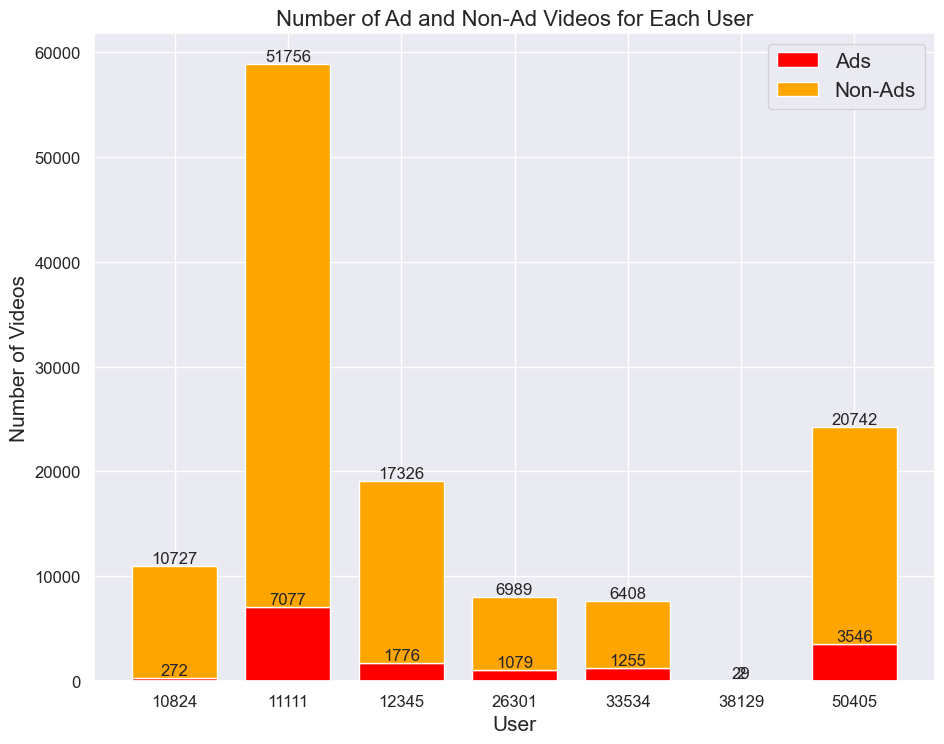

In [52]:
# Get the counts of ads and non-ads for each user
video_counts = all_dfs.groupby(['user', 'video_is_ad']).size().unstack(fill_value=0)

# Create bar plot using seaborn and matplotlib
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

# Plot the bars
bar_width = 0.75
index = range(len(video_counts.index))
ad_bars = plt.bar(index, video_counts[True], bar_width, label='Ads', color='red')
non_ad_bars = plt.bar(index, video_counts[False], bar_width, label='Non-Ads', color='orange', bottom=video_counts[True])

# Add labels, title, and legend
plt.xlabel('User', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('Number of Ad and Non-Ad Videos for Each User', fontsize=16)
plt.xticks(index, video_counts.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15)

# Annotate the bars with counts
for bar, ad_count, non_ad_count in zip(ad_bars, video_counts[True], video_counts[False]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{ad_count}', ha='center', va='bottom', fontsize=12)
    plt.text(bar.get_x() + bar.get_width()/2., height + non_ad_count, f'{non_ad_count}', ha='center', va='bottom', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

### Find all the advertisers

In [53]:
for code, adDf in zip(codes, ads):
    print(f'{code}')
    print(f"Number of advertiser accounts: {len(adDf['author_username'])}")
    print(f"Number of unique advertiser accounts: {len(adDf['author_username'].unique())}")
    print()

10824
Number of advertiser accounts: 272
Number of unique advertiser accounts: 239

11111
Number of advertiser accounts: 7077
Number of unique advertiser accounts: 1883

12345
Number of advertiser accounts: 1776
Number of unique advertiser accounts: 635

26301
Number of advertiser accounts: 1079
Number of unique advertiser accounts: 534

33534
Number of advertiser accounts: 1255
Number of unique advertiser accounts: 667

38129
Number of advertiser accounts: 2
Number of unique advertiser accounts: 2

50405
Number of advertiser accounts: 3546
Number of unique advertiser accounts: 1711



In [54]:
for code, adDf in zip(codes, ads):
    print(f'{code}')
    print(adDf['author_username'].value_counts().head(10))
    print()

10824
author_username
psyfe_official              4
godw3in                     3
joshleviworld               3
bigekane                    2
Scrubbing Bubbles           2
givenchybeauty              2
CapitalOne                  2
Ray-Ban Meta                2
Introducing Meta Quest 3    2
Tidy Cats                   2
Name: count, dtype: int64

11111
author_username
Chewy                  87
Dove                   61
Amazon Shopping        57
Peacock                51
tjmaxx                 50
primevideo             48
REESE'S                43
Maybelline New York    42
Amazon                 42
nyxcosmetics           38
Name: count, dtype: int64

12345
author_username
DoorDash - Food Delivery          145
Hinge - Dating & Relationships     65
Tinder Dating app. Meet People     38
googlepixel                        21
Canva: Design, Photo & Video       19
Grubhub                            19
McDonald's                         18
Nordstrom                          17
searchlightpics 

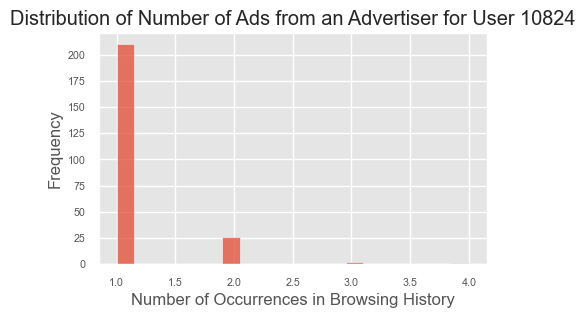

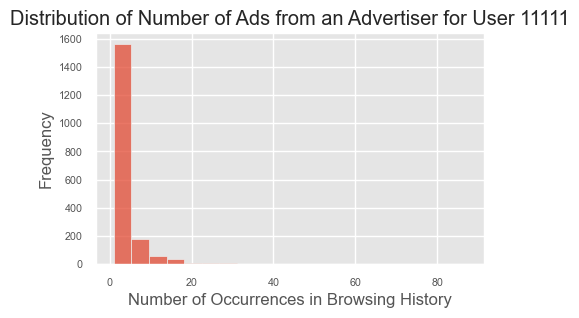

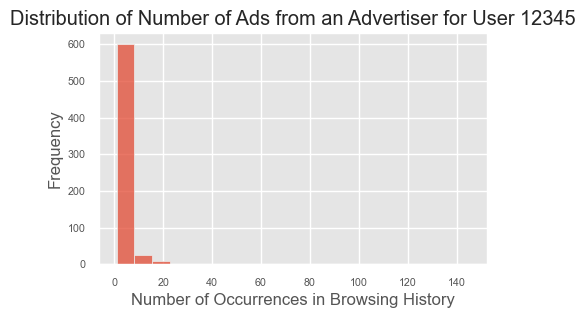

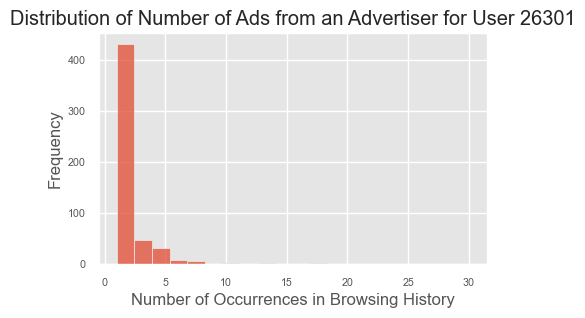

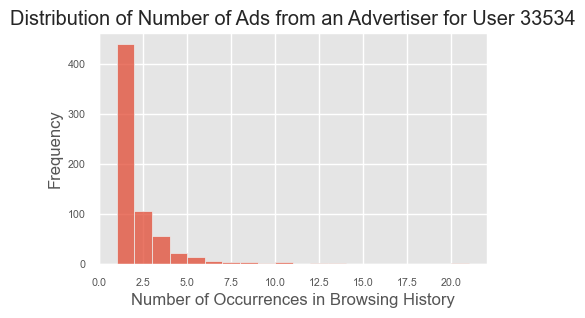

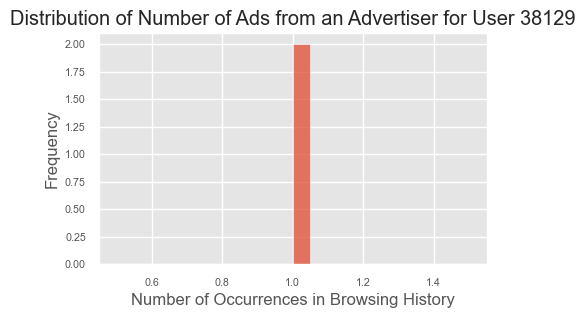

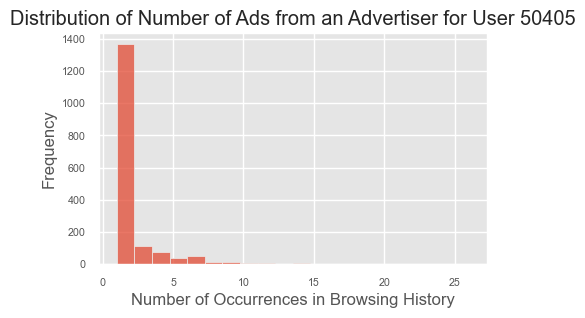

In [55]:
def plot_value_counts(code,df):
    val_counts = df['author_username'].value_counts()
    plt.style.use('ggplot')
    plt.figure(figsize=(5,3))
    sns.histplot(val_counts,bins=20)
    plt.title(f'Distribution of Number of Ads from an Advertiser for User {code}')
    plt.xlabel('Number of Occurrences in Browsing History')
    plt.ylabel('Frequency')
    plt.show()

for code, adDf in zip(codes, ads):
    plot_value_counts(code,adDf)

In [60]:
def plot_top_n_avertiser_frequency(n,code,df):
    # Get the top n most frequent advertisers
    val_counts = df['author_username'].value_counts().head(n)
    
    # Plot the frequency of the top n advertisers
    plt.style.use('ggplot')
    plt.figure(figsize=(5,3))
    sns.set(font_scale=0.7)
    sns.barplot(x=val_counts.index, y=val_counts.values)
    plt.title(f'Frequency of Top {n} Advertiser Accounts for User {code}')
    plt.xlabel('Advertiser Account')
    plt.ylabel('Frequency')
    plt.xticks(rotation=80)
    plt.show()

TypeError: to_dict() takes from 1 to 2 positional arguments but 4 were given

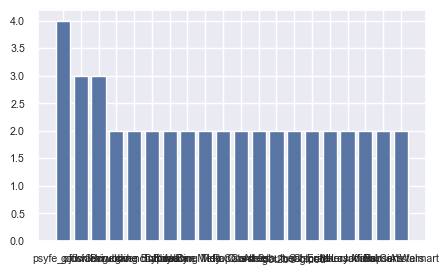

In [61]:
for code,adDf in zip(codes,ads):
#     plot_author_frequency(codes[i],ads[i])
    plot_top_n_avertiser_frequency(20,code,adDf)

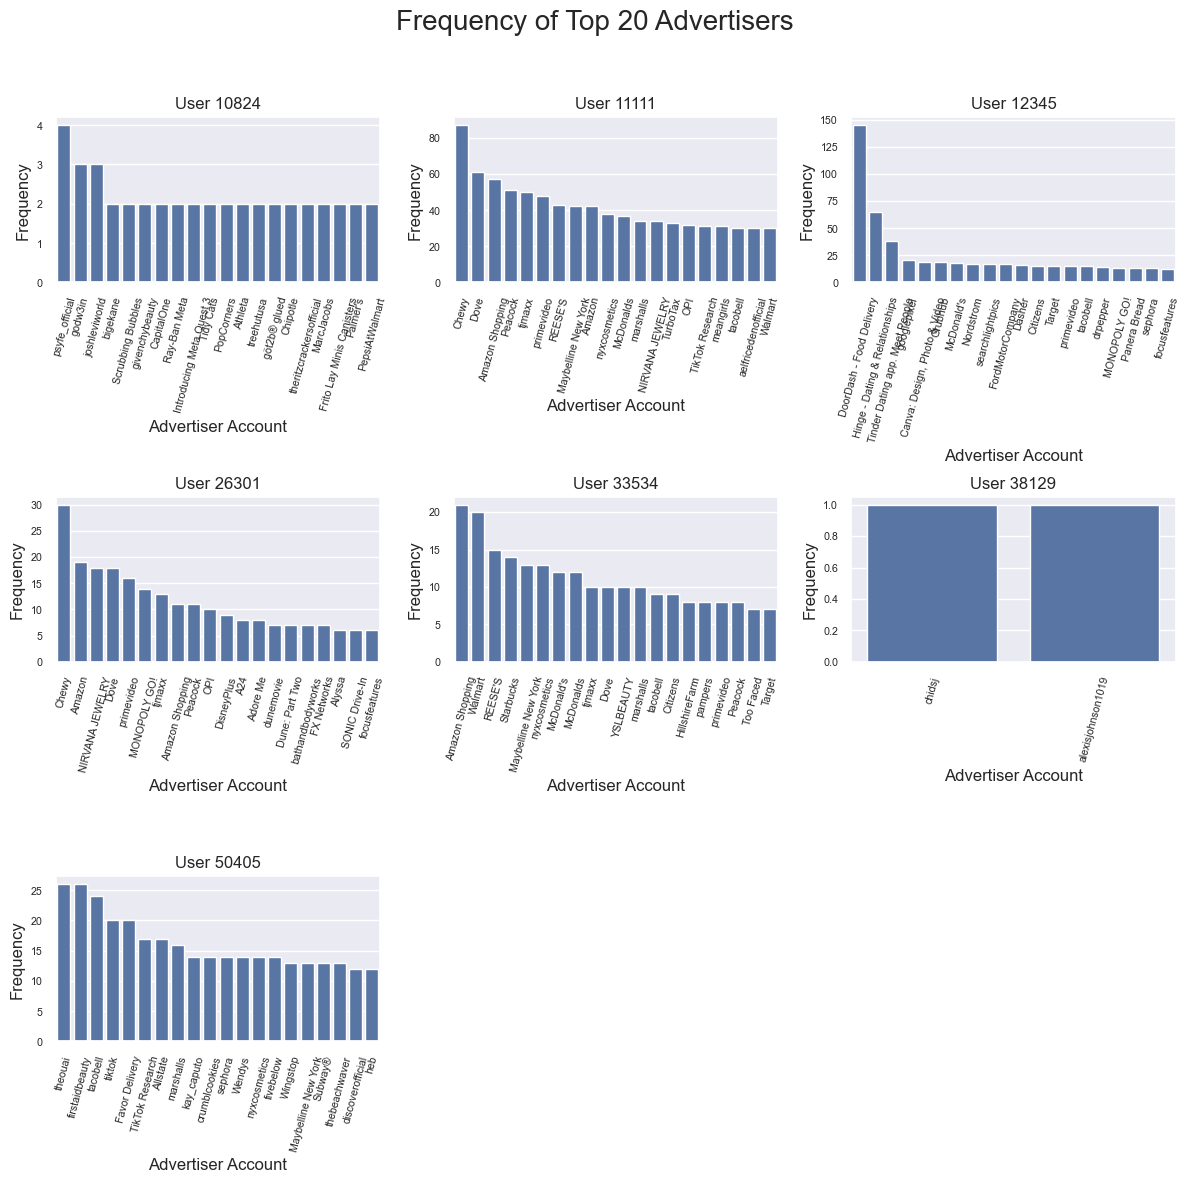

In [138]:
def plot_top_n_advertiser_frequency_multi(n, codes, data_frames):
    # Initialize the plot
    plt.figure(figsize=(12, 12))
    
    # Loop through each DataFrame
    for i, df in enumerate(data_frames):
        # Get the top n most frequent advertisers
        val_counts = df['author_username'].value_counts().head(n)
        
        # Plot the frequency of the top n advertisers
        plt.subplot(3, 3, i+1)  # Create subplots for each user
        sns.barplot(x=val_counts.index, 
                    y=val_counts.values,
                    
                   )
        plt.suptitle(f'Frequency of Top {n} Advertisers',fontsize=20)
        plt.title(f'User {codes[i]}',fontsize=12)  # Set title for each subplot
        plt.xlabel('Advertiser Account',fontsize=12)
        plt.ylabel('Frequency',fontsize=12)
        plt.xticks(rotation=75)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
        
plot_top_n_advertiser_frequency_multi(20,codes,ads)

In [139]:
advertiser_counts = all_ads.groupby('user')['author_username'].nunique()
advertiser_counts

user
10824     239
11111    1883
12345     635
26301     534
33534     667
38129       2
50405    1711
Name: author_username, dtype: int64

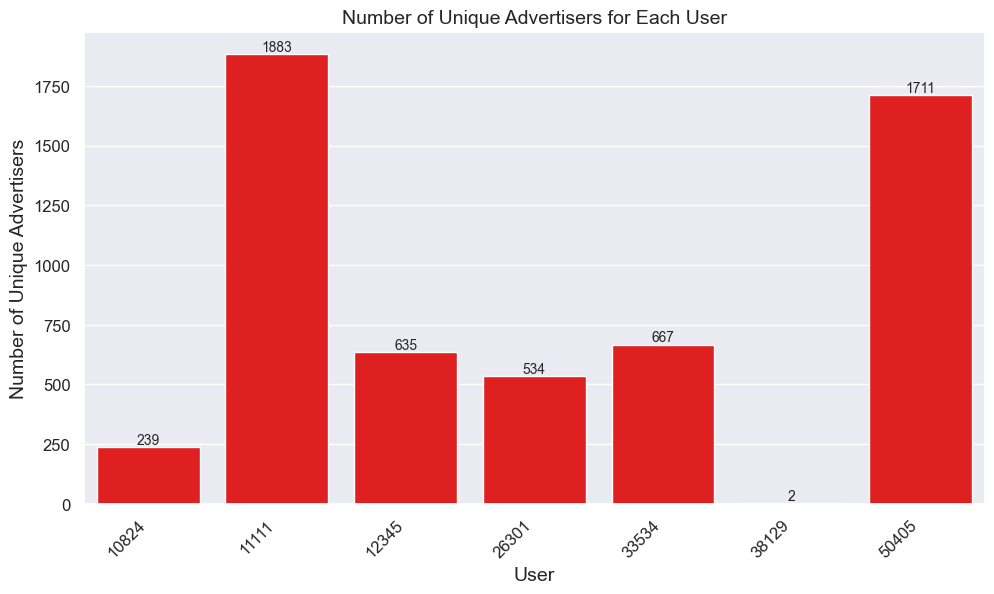

In [143]:
# Create bar plot using seaborn and matplotlib
plt.figure(figsize=(10, 6))

# Plot the bar
plot = sns.barplot(x=advertiser_counts.index, y=advertiser_counts.values, color='red')

# Add labels, title, and customization
plt.xlabel('User',fontsize=14)
plt.ylabel('Number of Unique Advertisers',fontsize=14)
plt.title('Number of Unique Advertisers for Each User', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()

# Add count on top of each bar
for index, value in (enumerate(advertiser_counts.values)):
    plot.text(index,value + 0.2, str(value),ha='center',va='bottom',fontsize=10)

# Show plot
plt.show()

### Check for overlap in the advertisers for our users

In [150]:
# Dictionary for each advertiser and user
advertiser_and_user = {}

# Add the advertisers to dict along with the 
for code, df in zip(codes, ads):
    advertiser_counter = Counter(df['author_name'])
    for key, value in advertiser_counter.items():
        if key in advertiser_and_user:
            advertiser_and_user[key].append((code, value))  # Append both code and count
        else:
            advertiser_and_user[key] = [(code, value)]  # Create a new list

print(advertiser_and_user)

{'abs.tract_': [('10824', 1)], '𝗠𝗜𝗦𝗦 𝗛𝗢𝗟𝗟𝗬𝗪𝗢𝗢𝗗': [('10824', 1), ('11111', 2)], 'JOSH LEVI': [('10824', 3)], 'THATSSOFETCH': [('10824', 1)], 'asos': [('10824', 1), ('12345', 1), ('50405', 1)], 'Aerianna Hubbard': [('10824', 1)], 'FLYANABOSS': [('10824', 1)], 'Kinzey Rae': [('10824', 1)], 'Godwin': [('10824', 3)], 'prettylittlething': [('10824', 1)], 'TheGaBrit🇬🇭🇬🇧': [('10824', 1)], 'Sacha Fierce': [('10824', 1)], 'EKANE 💅🏽': [('10824', 2), ('11111', 2)], 'PSYCHIC FEVER': [('10824', 4)], 'melodyguzmen': [('10824', 1)], 'khativygj5n': [('10824', 1), ('11111', 2), ('26301', 1)], 'Wireless Festival': [('10824', 1)], 'Joe Felix': [('10824', 1)], 'Zach King': [('10824', 1)], 'AshleyKaylaMakeup': [('10824', 1)], 'Armani Dex': [('10824', 1), ('11111', 2), ('33534', 1)], 'Loryn Powell': [('10824', 1)], 'DoorDash': [('10824', 2), ('12345', 1), ('50405', 3)], 'Prime Video': [('10824', 1), ('11111', 20), ('12345', 4), ('26301', 8), ('33534', 2), ('50405', 1)], 'EMPIRE': [('10824', 1)], 'K Money': [

In [151]:
num_overlap_advertisers = 0
for advertiser, user_list in advertiser_and_user.items():
    if len(user_list) > 2:
        num_overlap_advertisers += 1
        print(advertiser)
        print(user_list)
        print()
print(num_overlap_advertisers)

asos
[('10824', 1), ('12345', 1), ('50405', 1)]

khativygj5n
[('10824', 1), ('11111', 2), ('26301', 1)]

Armani Dex
[('10824', 1), ('11111', 2), ('33534', 1)]

DoorDash
[('10824', 2), ('12345', 1), ('50405', 3)]

Prime Video
[('10824', 1), ('11111', 20), ('12345', 4), ('26301', 8), ('33534', 2), ('50405', 1)]

Dasher
[('10824', 1), ('11111', 11), ('12345', 16), ('50405', 5)]

Walmart
[('10824', 2), ('11111', 30), ('12345', 2), ('26301', 5), ('33534', 20), ('50405', 8)]

JOANN Stores
[('10824', 2), ('11111', 2), ('12345', 1), ('26301', 1), ('50405', 1)]

MilanLaserHairRemoval
[('10824', 1), ('12345', 1), ('50405', 1)]

Allure
[('10824', 2), ('11111', 6), ('26301', 3)]

Design Eat Repeat, Easy Baking
[('10824', 1), ('11111', 4), ('33534', 1)]

Pau Dictado
[('10824', 1), ('11111', 2), ('26301', 1)]

arcsmile
[('10824', 1), ('11111', 2), ('33534', 1), ('50405', 3)]

VTAMAcream
[('10824', 1), ('11111', 2), ('33534', 1)]

Pop-Tarts
[('10824', 1), ('11111', 10), ('12345', 1), ('26301', 1), ('

In [ ]:
# Look at the time range for each user, monthly
# maybe make a couple of groups for each holiday